In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
import json

In [3]:
business=pd.read_csv("D:\Dataset\yelp_academic_dataset_business.csv")

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
review=pd.read_csv("D:\Dataset\yelp_academic_dataset_review.csv")

In [5]:
user=pd.read_csv("D:\Dataset\yelp_academic_dataset_user.csv")

In [6]:
checkin=pd.read_csv("D:\Dataset\yelp_academic_dataset_checkin.csv")

In [7]:
tip=pd.read_csv("D:\Dataset\yelp_academic_dataset_tip.csv")

###### Q.1. Construct a review network, where nodes are business and users, edges are reviews. Plot degree distributions (x-axis is nodes’ degrees, y-axis is the amount of nodes having that degree) of business and users, separately. You can try to plot the figures in linear scale and log scale. Which is better? Why? What you can learn from the distributions?


In [8]:
df1_reviewnetwork=review[['user_id','business_id']]

In [11]:
# Counting review edges for each business id from review dataset
df1_network_business=df1_reviewnetwork.groupby('business_id')
df1_network_business=df1_network_business.size()
df1_network_business = df1_network_business.add_suffix(' ').reset_index()
df1_network_business.drop(df1_network_business.index[[0]])
df1_network_business.columns=['Nodes:business_id','degree']

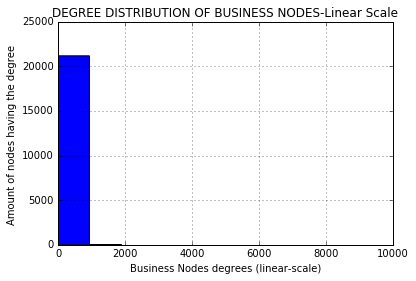

In [16]:
#Plotting degree distribution of business nodes
df1_network_business['degree'].hist()
plt.title("DEGREE DISTRIBUTION OF BUSINESS NODES-Linear Scale")
plt.xlabel("Business Nodes degrees (linear-scale)")
plt.ylabel("Amount of nodes having the degree ")

In [17]:
df1_network_business['log(degree)']=np.log(df1_network_business.degree)

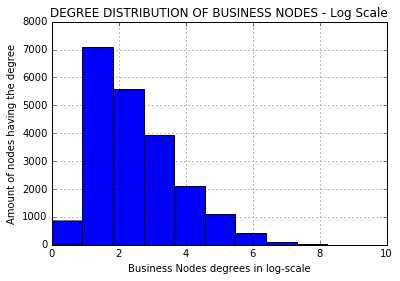

In [19]:
#Plotting degree distribution of business nodes - LOG SCALE
df1_network_business['log(degree)'].hist()
plt.title("DEGREE DISTRIBUTION OF BUSINESS NODES - Log Scale")
plt.xlabel("Business Nodes degrees in log-scale")
plt.ylabel("Amount of nodes having the degree")

In [21]:
# Counting review edges for each user node from review dataset
df1_reviewnetwork_user=df1_reviewnetwork.groupby('user_id')
df1_reviewnetwork_user=df1_reviewnetwork_user.size()
df1_reviewnetwork_user = df1_reviewnetwork_user.add_suffix(' ').reset_index()
df1_reviewnetwork_user.drop(df1_reviewnetwork_user.index[[0]])
df1_reviewnetwork_user.columns=['Nodes:user_id','degree']

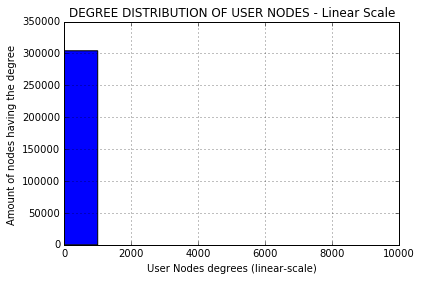

In [22]:
#Plotting degree distribution of users
df1_reviewnetwork_user['degree'].hist()
plt.title("DEGREE DISTRIBUTION OF USER NODES - Linear Scale")
plt.xlabel("User Nodes degrees (linear-scale)")
plt.ylabel("Amount of nodes having the degree ")

In [23]:
df1_reviewnetwork_user['log(degree)']=np.log(df1_reviewnetwork_user.degree)
#df1_reviewnetwork_user

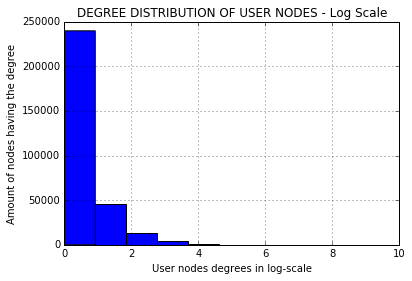

In [25]:
#Plotting degree distribution of users - LOG SCALE
df1_reviewnetwork_user['log(degree)'].hist()
plt.title("DEGREE DISTRIBUTION OF USER NODES - Log Scale")
plt.xlabel("User nodes degrees in log-scale")
plt.ylabel("Amount of nodes having the degree")

Linear scale Vs Log scale plot distributions:
In the above plot distributions, it's apparent that log-scale values depict a better representation of degree distribution. This is because we have enormous dataset. Linear scale depicts degrees of individual items and for such a huge dataset, observing individual degrees is not a good idea. By taking log-scale, we have grouped our huge dataset and created ranges of degrees. So, the degree-distribution plot with log scale gives better representation of this huge dataset. 
For instance, in business degree distribution, degrees range upto 1200 in linear scale plot. In log-scale plot, degrees have been divided into 8 ranges. And hence, the distribution is more clear than that of linear-scale plot.

Learning from the distributions:
From the business degree-distribution graph, it can be inferred that degrees of businesses increases steeply at the beginning and then gradually decreases. 
In the user degree-distribution graph, degrees of users are decreasing.


##### (2*) Run pagerank algorithm on the review network (note it’s undirected graph). Which are top 100 business with highest pagerank scores? Store and submit the results in Json format. Example answer. For efficient computation, you may want to go through this before you start.

In [26]:
#contains business ids and user ids that are connected through 'review edges'
df2_reviewnetwork=df1_reviewnetwork

In [27]:
#creating unique node id for all business ids so that can be used as indices while creating csr_matrix
df2_businessIndices=df2_reviewnetwork[['business_id']].drop_duplicates()
df2_businessIndices=df2_businessIndices[df2_businessIndices.business_id!='#NAME?']
df2_businessIndices=df2_businessIndices.reset_index(drop=True)
biz_counts=len(df2_businessIndices.index)
df2_businessIndices['BizNodeID']=pd.DataFrame({'':range(0,biz_counts,1)})

In [28]:
#creating unique node id for all user ids so that can be used as indices while creating csr_matrix
df2_userIndices=df2_reviewnetwork[['user_id']].drop_duplicates()
df2_userIndices=df2_userIndices[df2_userIndices.user_id!='#NAME?']
df2_userIndices=df2_userIndices.reset_index(drop=True)
df2_userIndices['UserNodeid']=pd.DataFrame({'':range((0+biz_counts),(biz_counts+len(df2_userIndices.index)),1)})

In [29]:
df2_nodeIDs=pd.merge(df2_reviewnetwork,df2_businessIndices,on='business_id',how='inner')
df2_nodeIDs=pd.merge(df2_nodeIDs,df2_userIndices,on='user_id',how='inner')
df2_nodeIDs

,user_id,business_id,BizNodeID,UserNodeid
0,PUFPaY9KxDAcGqfsorJp3Q,5UmKMjUEUNdYWqANhGckJw,0,21240
1,PUFPaY9KxDAcGqfsorJp3Q,WaHXyBwljbKNPmmJZn5j8Q,80,21240
2,PUFPaY9KxDAcGqfsorJp3Q,u22QDAON1kk0wjoTliyftw,83,21240
3,PUFPaY9KxDAcGqfsorJp3Q,4ykgzzzGEWjMD5lwk1-l9A,84,21240
4,PUFPaY9KxDAcGqfsorJp3Q,2PfavOTufsPCRdYm-bFcpw,195,21240
5,PUFPaY9KxDAcGqfsorJp3Q,8tBfgYCI6Fz9xrSYCYCYXA,311,21240
6,PUFPaY9KxDAcGqfsorJp3Q,DhwPdZ-67IgFc_XcVS30BA,10890,21240
7,Iu6AxdBYGR4A0wspR9BYHA,5UmKMjUEUNdYWqANhGckJw,0,21241
8,auESFwWvW42h6alXgFxAXQ,5UmKMjUEUNdYWqANhGckJw,0,21242
9,qiczib2fO_1VBG8IoCGvVg,5UmKMjUEUNdYWqANhGckJw,0,21243


In [30]:
#Creating CSR matrix from DF df2_nodeIDs
EDGES=len(df2_nodeIDs.index)
NODES=biz_counts+len(df2_userIndices.index)
row=df2_nodeIDs.BizNodeID
col=df2_nodeIDs.UserNodeid
csr_m=sparse.csr_matrix(([True]*EDGES,(row,col)),shape=(NODES,NODES))
csr_m

<325483x325483 sparse matrix of type '<type 'numpy.bool_'>'
	with 754117 stored elements in Compressed Sparse Row format>

In [31]:
# Saving and loading CSR matrix in a file format
def csr_save(filename,csr):
    np.savez(filename,
        nodes=csr.shape[0],
        edges=csr.data.size,
        indices=csr.indices,
        indptr =csr.indptr
    )
def csr_load(filename):
    loader = np.load(filename)
    edges = int(loader['edges'])
    nodes = int(loader['nodes'])
    return sparse.csr_matrix(
        (np.bool_(np.ones(edges)), loader['indices'], loader['indptr']),
        shape = (nodes,nodes)
    )


In [32]:
DATASET_NATIVE = 'review-network.npz'
csr_save(DATASET_NATIVE,csr_m)
%time csr = csr_load(DATASET_NATIVE)

Wall time: 20 ms


In [33]:
#Calculating PageRank Algo
def compute_PageRank(G, beta=0.85, epsilon=10**-4):
    #Test adjacency matrix is OK
    n,_ = G.shape
    assert(G.shape==(n,n))
    #Constants Speed-UP
    deg_out_beta = G.sum(axis=0).T/beta #vector
    #Initialize
    ranks = np.ones((n,1))/n #vector
    time = 0
    flag = True
    while flag:        
        time +=1
        with np.errstate(divide='ignore'): # Ignore division by 0 on ranks/deg_out_beta
            new_ranks = G.dot((ranks/deg_out_beta)) #vector
        #Leaked PageRank
        new_ranks += (1-new_ranks.sum())/n
        #Stop condition
        if np.linalg.norm(ranks-new_ranks,ord=1)<=epsilon:
            flag = False        
        ranks = new_ranks
    return(ranks, time)

In [35]:
#Computing PageRank of review network
%time pr,iters = compute_PageRank(csr)
print('\nIterations required to compute pagerank: {0}'.format(iters))



Wall time: 710 ms

Iterations required to compute pagerank: 42


In [37]:
df_pagerank=pd.DataFrame(data=pr)
df_pagerank.columns=['PageRank']
df_pagerank=df_pagerank.sort_values(by='PageRank',axis=0,ascending=False)
df_pagerank['BizNodeID']=df_pagerank.index

In [38]:
df_pagerank_biz=df2_businessIndices.merge(df_pagerank,on='BizNodeID')
df_pagerank_biz=df_pagerank_biz.sort_values(by='PageRank',axis=0,ascending=False)
print('\nTop 100 business with highest pageranks are:-\n')
df_top100business=df_pagerank_biz.head(100)
df_top100business


Top 100 business with highest pageranks are:-



,business_id,BizNodeID,PageRank
19919,4bEjOyTaDG24SY5TxsaUNQ,19919,0.004095
19791,lliksv-tglfUz1T3B3vgvA,19791,0.002108
19926,6LM_Klmp3hOP0JmsMCKRqQ,19926,0.001961
20081,YNQgak-ZLtYJQxlDwN-qIg,20081,0.001859
19936,tFU2Js_nbIZOrnKfYJYBBg,19936,0.001776
19924,NGJDjdiDJHmN2xxU7KauuA,19924,0.001748
19971,CZjcFdvJhksq9dy58NVEzw,19971,0.001732
20284,1yx2zLskVTe5WQdYjL2Apw,20284,0.001715
20525,xfwRO04KbAPw_zRotCfWQQ,20525,0.001625
19911,eWPFXL1Bmu1ImtIa2Rqliw,19911,0.001625


In [39]:
#Genearting json
count=0;
with open('output4.json', 'w') as outfile:
    for index in df_top100business.index:        
        count+=1
        key='Top'+str(count)
        data ={ key:{'pagerank':df_top100business.loc[index]['PageRank'], 'business_id': df_top100business.loc[index]['business_id']}}
        json.dump(data,outfile)

### Q.3. Can you find other ways to rank restaurants? For example, average ratings of restaurants. Define 5 such ranking features and do pair-wise Spearman's rank correlation to see how much each feature correlate with each other. Report p-values using permutation test. 

##### Ranking features 1 and 2 - Number of stars and reviews given to a business can tell how much is the popularity of the business

In [40]:
#Ranking features - stars, review_count
df_RF1n2 = business[['business_id','stars','review_count']]

In [41]:
df_review=review[['user_id','business_id']]

In [42]:
print('\nExtracting review counts given by each user on Yelp from user dataset\n')
df_user = user[['user_id','review_count']]


Extracting review counts given by each user on Yelp from user dataset



In [43]:
df_user_review=pd.merge(df_user,df_review,on='user_id',how='outer')
df_u_r_b=df_user_review.groupby('business_id')

##### Ranking feature 3 - Each user has given some number of reviews to businesses. An user with higher number of reviews shows how much the user is active on Yelp. If an active user reviews a business, it means the business is quite popular. So, considering this trait, we have taken average of total reviews on Yelp of every user that has reviewed a business. Instead of taking mere review counts , we are trying to calculate the activeness of the reviews a business has got. Below is the implementation of finding the activeness:-

In [44]:
df_RF3=df_u_r_b.mean()
df_RF3 = df_RF3.add_suffix('_activeness').reset_index()
#df_RF3.drop(df_RF3.index[[0]])
df_RF3=df_RF3[df_RF3.business_id!='#NAME?']

##### Ranking feature 4 - Number of tips given to a business can also indicate how much the business is popular

In [45]:
df_RF4=tip[['business_id']]
df_RF4=df_RF4.groupby('business_id')
df_RF4=df_RF4.size()
df_RF4 = df_RF4.add_suffix('').reset_index()
df_RF4=df_RF4[df_RF4.business_id!='#NAME?']
df_RF4.columns=['business_id','tips_count']

In [46]:
df_checkin=checkin
df_checkin

df_checkin_1=df_checkin['business_id']

In [47]:
df_checkin=df_checkin.drop('business_id',1)
df_checkin=df_checkin.drop('type',1)


In [48]:
df_checkin_sum=df_checkin.sum(axis=1) #finding total checkins per week for each business id

In [49]:
frames=[df_checkin_1,df_checkin_sum]

##### Ranking feature 5 - Taking number of check-ins per week in a business as the fifth ranking feature

In [50]:
df_RF5=pd.concat(frames,axis=1)

In [51]:
df_RF5.columns=['business_id','checkin_count']

In [52]:
#Merging all ranking features now
df_ranking_features=df_RF1n2.merge(df_RF3,on='business_id',how='outer').merge(df_RF5,on='business_id',how='outer').merge(df_RF4,on='business_id',how='outer')
df_ranking_features = df_ranking_features.fillna(0)
df_ranking_features

,business_id,stars,review_count,review_count_activeness,checkin_count,tips_count
0,5UmKMjUEUNdYWqANhGckJw,3.5,7,24.285714,0.0,1.0
1,UsFtqoBl7naz8AVUBZMjQQ,3.0,5,57.800000,0.0,0.0
2,cE27W9VPgO88Qxe4ol6y_g,2.5,5,47.800000,9.0,1.0
3,mVHrayjG3uZ_RLHkLj-AMg,4.5,26,25.166667,28.0,2.0
4,mYSpR_SLPgUVymYOvTQd_Q,5.0,3,28.000000,8.0,0.0
5,KayYbHCt-RkbGcPdGOThNg,4.0,23,103.526316,65.0,4.0
6,b12U9TFESStdy7CsTtcOeg,2.5,9,71.000000,7.0,0.0
7,Sktj1eHQFuVa-M4bgnEh8g,4.0,4,229.250000,0.0,0.0
8,3ZVKmuK2l7uXPE6lXY4Dbg,2.5,3,342.000000,0.0,0.0
9,QoDa50dc7g62xciFygXB9w,4.0,7,7.400000,7.0,0.0


In [53]:
df_corr=df_ranking_features.corr(method='spearman')
df_corr

,stars,review_count,review_count_activeness,checkin_count,tips_count
stars,1.000000,-0.029950,-0.124832,-0.129208,-0.109120
review_count,-0.029950,1.000000,0.047109,0.719095,0.716523
review_count_activeness,-0.124832,0.047109,1.000000,0.097127,0.077750
checkin_count,-0.129208,0.719095,0.097127,1.000000,0.817763
tips_count,-0.109120,0.716523,0.077750,0.817763,1.000000


#### Generating permutation tests function for the ranking features

In [70]:
#Generating permutation tests function
#generating random values each column 
def generate_perm_test(df,feature1,feature2):
    no_permutations=1000
    for num in range(1,no_permutations):
        iterator=df[feature2].count()
        random=df[feature2].sample(n=iterator)
        col_heading='Perm#'+str(num)
        df_perm1=pd.DataFrame({col_heading:random.values}) 
        df=pd.concat([df,df_perm1],axis=1) #merging permuted column in original DF
    df_corr_ptest=df.corr(method='spearman')
    df_corr_ptest=df_corr_ptest.loc[[feature1]]
    #Calculating p value
    actual_R_Neg=df_corr_ptest[feature2][0]
    del df_corr_ptest[feature1]
    numerator=0.0
    for column in df_corr_ptest:
        if(df_corr_ptest[column][0]<=actual_R_Neg):
            numerator=numerator+1
    print ('R value from actual dataset =',actual_R_Neg)
    print ('Number of permutation sets that have r value above r value of actual dataset',numerator)
    pValue=numerator/no_permutations
    print ('P-value =',pValue)
    return df_corr_ptest

In [71]:
print('Taking pair1 as stars and review count and performing perm tests')
df3_pair1=df_ranking_features[['stars','review_count']]
df3_ptest_pair1=generate_perm_test(df3_pair1,'stars','review_count')

Taking pair1 as stars and review count and performing perm tests
('R value from actual dataset =', -0.029950459590249091)
('Number of permutation sets that have r value above r value of actual dataset', 1.0)
('P-value =', 0.1)


In [72]:
print('Taking pair2 as stars and review_count_activeness and performing perm tests')
df3_pair1=df_ranking_features[['stars','review_count_activeness']]
df3_ptest_pair1=generate_perm_test(df3_pair1,'stars','review_count_activeness')

Taking pair2 as stars and review_count_activeness and performing perm tests
('R value from actual dataset =', -0.12483198280122293)
('Number of permutation sets that have r value above r value of actual dataset', 1.0)
('P-value =', 0.1)


In [73]:
print('Taking pair3 as stars and checkin_count and performing perm tests')
df3_pair1=df_ranking_features[['stars','checkin_count']]
df3_ptest_pair1=generate_perm_test(df3_pair1,'stars','checkin_count')

Taking pair3 as stars and checkin_count and performing perm tests
('R value from actual dataset =', -0.1292076678157254)
('Number of permutation sets that have r value above r value of actual dataset', 1.0)
('P-value =', 0.1)


In [74]:
print('Taking pair4 as stars and tips_count and performing perm tests')
df3_pair1=df_ranking_features[['stars','tips_count']]
df3_ptest_pair1=generate_perm_test(df3_pair1,'stars','tips_count')

Taking pair4 as stars and tips_count and performing perm tests
('R value from actual dataset =', -0.10911961374950908)
('Number of permutation sets that have r value above r value of actual dataset', 1.0)
('P-value =', 0.1)


##### Q.4 Aggregate 5 ranking features as the prior of restaurants (instead of using uniform distribution priors). Rerun pagerank on the review network. Compare the new top 100 business with the ones from Question (2). Do they change? If yes, explain why they are desirable changes.


We can take ranking features as number of stars, review count, activeness of the reviewers, number of check-ins per week,number of tips given to a business . Since, the feature values are not scaled, taking score of each feature as deviation from its minimum value. After scaling the ranking feature values, taking the cumulative score of all these features for each business and taking those values as initial seeds to the pagerank algorithm.

In [75]:
df4=df_ranking_features

In [76]:
df4['stars'] = (df4['stars'] - df4['stars'].min())/(df4['stars'].max()-df4['stars'].min())
df4['review_count'] = (df4['review_count'] - df4['review_count'].min())/((df4['review_count'].max()-df4['review_count'].min()))
df4['review_count_activeness'] = (df4['review_count_activeness'] - df4['review_count_activeness'].min())/(df4['review_count_activeness'].max()-df4['review_count_activeness'].min())
df4['checkin_count'] = (df4['checkin_count'] - df4['checkin_count'].min())/(df4['checkin_count'].max()-df4['checkin_count'].min())
df4['tips_count'] = (df4['tips_count'] - df4['tips_count'].min())/(df4['tips_count'].max()-df4['tips_count'].min())
df4

,business_id,stars,review_count,review_count_activeness,checkin_count,tips_count
0,5UmKMjUEUNdYWqANhGckJw,0.625,0.000645,0.005081,0.000000,0.000351
1,UsFtqoBl7naz8AVUBZMjQQ,0.500,0.000323,0.012092,0.000000,0.000000
2,cE27W9VPgO88Qxe4ol6y_g,0.375,0.000323,0.010000,0.000106,0.000351
3,mVHrayjG3uZ_RLHkLj-AMg,0.875,0.003711,0.005265,0.000328,0.000702
4,mYSpR_SLPgUVymYOvTQd_Q,1.000,0.000000,0.005858,0.000094,0.000000
5,KayYbHCt-RkbGcPdGOThNg,0.750,0.003227,0.021658,0.000763,0.001404
6,b12U9TFESStdy7CsTtcOeg,0.375,0.000968,0.014854,0.000082,0.000000
7,Sktj1eHQFuVa-M4bgnEh8g,0.750,0.000161,0.047960,0.000000,0.000000
8,3ZVKmuK2l7uXPE6lXY4Dbg,0.375,0.000000,0.071548,0.000000,0.000000
9,QoDa50dc7g62xciFygXB9w,0.750,0.000645,0.001548,0.000082,0.000000


In [77]:
df4_sum=df4.sum(axis=1)
total=df4_sum.sum()
df4_sum = df4_sum / total
#df4_sum.sum()

In [78]:
df4_Score=pd.concat([df4['business_id'],df4_sum],axis=1)
df4_Score.columns=['business_id','Score']

In [80]:
df4_Score_Indices=pd.merge(df2_businessIndices,df4_Score,on='business_id',how='inner')
df4_Score_Indices=df4_Score_Indices.sort_values(by='BizNodeID',axis=0)

In [81]:
df4_Score_Indices['Init_Rank']=df4_Score_Indices['Score']
df4_Score_Indices

,business_id,BizNodeID,Score,Init_Rank
0,5UmKMjUEUNdYWqANhGckJw,0,0.000011,0.000011
1,UsFtqoBl7naz8AVUBZMjQQ,1,0.000009,0.000009
2,cE27W9VPgO88Qxe4ol6y_g,2,0.000007,0.000007
3,mVHrayjG3uZ_RLHkLj-AMg,3,0.000015,0.000015
4,mYSpR_SLPgUVymYOvTQd_Q,4,0.000017,0.000017
5,KayYbHCt-RkbGcPdGOThNg,5,0.000013,0.000013
6,b12U9TFESStdy7CsTtcOeg,6,0.000007,0.000007
7,Sktj1eHQFuVa-M4bgnEh8g,7,0.000013,0.000013
8,3ZVKmuK2l7uXPE6lXY4Dbg,8,0.000008,0.000008
9,QoDa50dc7g62xciFygXB9w,9,0.000013,0.000013


In [90]:
df4_userScore=df2_userIndices[['UserNodeid']]
df4_userScore['Init_Rank']=0.00000001
df4_userScore.columns=['NodeID','Init_Rank']
df4_businessScore=df4_Score_Indices[['BizNodeID','Init_Rank']]
df4_businessScore.columns=['NodeID','Init_Rank']
df4_nodes_rank=pd.concat([df4_businessScore,df4_userScore],axis=0)
print('\nAssigning initial rank to each node in review network graph\n')
df4_nodes_rank


Assigning initial rank to each node in review network graph



,NodeID,Init_Rank
0,0,1.065845e-05
1,1,8.654324e-06
2,2,6.515538e-06
3,3,1.494714e-05
4,4,1.698981e-05
5,5,1.312385e-05
6,6,6.602091e-06
7,7,1.347971e-05
8,8,7.541883e-06
9,9,1.270541e-05


##### Initialising the prior of the page rank algorithm as score of ranking function described above :-

In [84]:
df4_ranks=df4_nodes_rank[['Init_Rank']]
df4_ranks=df4_ranks.as_matrix()

In [85]:
#Calculating PageRank Algo
def compute_PageRank(G, beta=0.85, epsilon=10**-4):
    n,_ = G.shape
    assert(G.shape==(n,n))
    deg_out_beta = G.sum(axis=0).T/beta 
    ranks = df4_ranks 
    time = 0
    flag = True
    while flag:        
        time +=1
        with np.errstate(divide='ignore'): # Ignore division by 0 on ranks/deg_out_beta
            new_ranks = G.dot((ranks/deg_out_beta)) #vector
        new_ranks += (1-new_ranks.sum())/n
        if np.linalg.norm(ranks-new_ranks,ord=1)<=epsilon:
            flag = False        
        ranks = new_ranks
    return(ranks, time)

In [86]:
#Computing PageRank of review network using priors as score of ranking function
%time pr_4,iters_4 = compute_PageRank(csr)
print('\nIterations required to compute pagerank: {0}'.format(iters_4))

Wall time: 760 ms

Iterations required to compute pagerank: 43


In [87]:
df4_pagerank=pd.DataFrame(data=pr_4)
df4_pagerank.columns=['PageRank']
df4_pagerank=df4_pagerank.sort_values(by='PageRank',axis=0,ascending=False)
df4_pagerank['BizNodeID']=df4_pagerank.index
df4_pagerank

,PageRank,BizNodeID
19919,0.004095,19919
19791,0.002108,19791
19926,0.001961,19926
20081,0.001859,20081
19936,0.001776,19936
19924,0.001748,19924
19971,0.001732,19971
20284,0.001715,20284
20525,0.001625,20525
19911,0.001625,19911


In [88]:
df4_pagerank_biz=df2_businessIndices.merge(df4_pagerank,on='BizNodeID')
df4_pagerank_biz=df4_pagerank_biz.sort_values(by='PageRank',axis=0,ascending=False)
print('\nTop 100 business with highest pageranks are:-\n')
df4_pagerank_biz.head(100)


Top 100 business with highest pageranks are:-



,business_id,BizNodeID,PageRank
19919,4bEjOyTaDG24SY5TxsaUNQ,19919,0.004095
19791,lliksv-tglfUz1T3B3vgvA,19791,0.002108
19926,6LM_Klmp3hOP0JmsMCKRqQ,19926,0.001961
20081,YNQgak-ZLtYJQxlDwN-qIg,20081,0.001859
19936,tFU2Js_nbIZOrnKfYJYBBg,19936,0.001776
19924,NGJDjdiDJHmN2xxU7KauuA,19924,0.001748
19971,CZjcFdvJhksq9dy58NVEzw,19971,0.001732
20284,1yx2zLskVTe5WQdYjL2Apw,20284,0.001715
20525,xfwRO04KbAPw_zRotCfWQQ,20525,0.001625
19911,eWPFXL1Bmu1ImtIa2Rqliw,19911,0.001625


Sources referred :

[1] http://blog.samuelmh.com/2015/02/pagerank-sparse-matrices-python-ipython.html

[2] https://en.wikipedia.org/wiki/PageRank